# Bài tập 2: Descriptive Statistics - Life of battery

### Bài toán 1: Một nhà sản xuất đang điều tra tuổi thọ hoạt động của pin máy tính xách tay (Battery 1).  Các quan sát được liệt kê trong tập tin life_batteries.txt.
1. Tạo life_array từ nội dung tập tin.
2. Vẽ biểu đồ phân phối tần suất của life_array
3. Làm bảng phân phối tần suất cho dữ liệu theo các khoảng 120-129, 130-139, 140-149, 150 - 159, 160 - 169. 
4. Vẽ biểu đồ khối cho bảng phân phối tần suất trên. Biểu đồ câu 2 và câu 4 nói lên điều gì?
5. Thống kê cơ bản cho life_array; mean, median, mode (gồm những giá trị nào? số lần là bao nhiêu?), max, min, variance, std
6. Tìm độ nhọn, độ xiên của dữ liệu. Nhận xét kết quả


### Bài toán 2: Xem xét một bộ dữ liệu 40 mẫu khác cho một nhãn hiệu pin khác (Battery 2). Các quan sát được liệt kê trong tập tin life_batteries_2.txt.
1. Tạo life2_array từ nội dung tập tin.
2. So sánh 2 nhóm battery 1 (ở bài toán 1) và battery 2 (ở bài toán 2) theo histogram và nhận xét
3. Làm bảng phân phối tần suất của Battery 2 cho dữ liệu 120-129, 130-139, 140-149, 150 - 159, 160 - 169.
4. Vẽ biểu đồ khối cho bảng phân phối tần suất trên. Biểu đồ câu 2 và câu 4 nói lên điều gì?
5. So sánh hai nhóm mẫu dựa trên thống kê chung (dùng stats.describe(array)) , nhận xét kết quả.
6. Tạo dataframe chứa tần suất của cả 2 nhóm mẫu gồm có 2 cột là batteries_1 và batteries_1, index là các khoảng như câu 3
7. Vẽ boxplot cho cả 2 nhóm batteries_1 và batteries_2 => nhận xét

## Bài toán 1: Gợi ý

In [3]:
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Tạo life_array từ nội dung tập tin.
f=open("life_batteries.txt", "r")

In [5]:
content = f.read()
f.close()
content

'130\t145\t126\t146\n164\t130\t132\t152\n145\t129\t133\t155\n140\t127\t139\t137\n131\t126\t145\t148\n125\t132\t126\t126\n126\t135\t131\t129\n147\t136\t129\t136\n156\t146\t130\t146\n132\t142\t132\t132\n'

In [6]:
life = content.split()
life = list(map(int, life))
life_array = np.array(life)
life_array

array([130, 145, 126, 146, 164, 130, 132, 152, 145, 129, 133, 155, 140,
       127, 139, 137, 131, 126, 145, 148, 125, 132, 126, 126, 126, 135,
       131, 129, 147, 136, 129, 136, 156, 146, 130, 146, 132, 142, 132,
       132])

In [7]:
print(type(life_array))
print(life_array.size)

<class 'numpy.ndarray'>
40


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

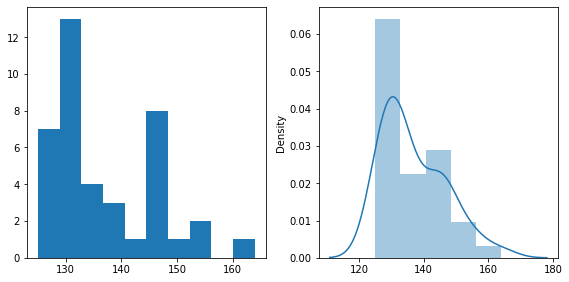

In [9]:
# Vẽ biểu đồ phân phối tần suất của life_array và nhận xét
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.hist(life_array)
plt.subplot(1, 2, 2)
sns.distplot(life_array)
plt.tight_layout(True)
plt.show()

In [10]:
import pandas as pd

In [11]:
# Làm bảng phân phối tần suất cho dữ liệu theo các khoảng 120-129, 130-139, 140-149, 150 - 159, 160 - 169
freq = pd.Series()
freq['120-129'] = np.extract((life_array>=120) & (life_array <=129), life_array).size
freq['130-139'] = np.extract((life_array>=130) & (life_array <=139), life_array).size
freq['140-149'] = np.extract((life_array>=140) & (life_array <=149), life_array).size
freq['150-159'] = np.extract((life_array>=150) & (life_array <=159), life_array).size
freq['160-169'] = np.extract((life_array>=160) & (life_array <=169), life_array).size

In [12]:
freq

120-129    10
130-139    16
140-149    10
150-159     3
160-169     1
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

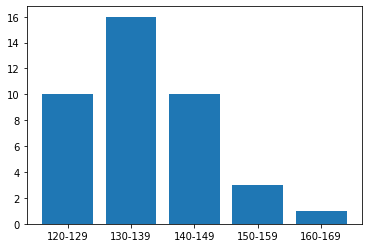

In [14]:
# Vẽ bar chart cho bảng phân phối tần suất trên
plt.bar(freq.index, freq)
plt.show()

#### Chart này nói lên điều gì?
- Biểu đồ cho thấy hầu hết các dữ liệu được tập trung trong khoảng 130, với một vài điểm dữ liệu vượt quá 150. Có thể kết luận rằng trung tâm của dữ liệu là một nơi nào đó trong khoảng 130-139.
- Từ hai biểu đồ trên, có thể xác định nhiều biện pháp phân tán và xu hướng trung tâm:

In [15]:
# max, min, range, mode, median, variance, std
from scipy import stats

In [16]:
life_array.mean()

136.85

In [17]:
life_array.max()

164

In [18]:
life_array.min()

125

In [19]:
# Tìm mode
life_mode = stats.mode(life_array)
life_mode

ModeResult(mode=array([126]), count=array([5]))

In [20]:
mode_value = life_mode[0][0]
mode_value

126

In [21]:
mode_freq = life_mode[1][0]
mode_freq

5

In [22]:
# Tìm range
range_life = np.ptp(life_array)
range_life

39

In [23]:
# Tìm phương sai
life_var = np.var(life_array)
life_var

93.4775

In [24]:
# Tìm độ lệch chuẩn Standard deviation 
std_cars = np.std(life_array)
std_cars

9.66837628560246

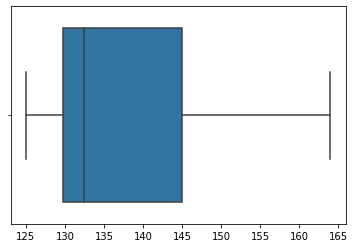

In [25]:
# Vẽ boxplot, tìm outlier
sns.boxplot(life_array)
plt.show()

In [26]:
# Không có outlier

In [27]:
# Tìm độ xiên (Skewness) của life_array. Nhận xét kết quả.
skew_life = stats.skew(life_array)
skew_life

0.8455287049086152

In [28]:
# Ta thấy skew_life > 0 => phân phối lệch phải 

In [29]:
# Tìm độ nhọn Kurtosis của life_array. Nhận xét kết quả.
kur_life = stats.kurtosis(life_array) # mặc định Fisher = True  thì kur - 3
kur_life

-0.07613238307755621

- Với độ nhọn = 3 (theo Pearson) hoặc = 0 (theo Kurtosis ) thì sẽ là phân phối chuẩn , ở đây độ nhọn < 3 (<00) => phân bố này thấp hơn phân bố chuẩn

## Bài toán 2: Gợi ý
#### Xem xét một bộ dữ liệu 40 mẫu khác cho một nhãn hiệu pin khác (Battery 2). Các quan sát được liệt kê trong tập tin life_batteries_2.txt.

In [30]:
# Tạo life2_array từ nội dung tập tin.
f2=open("life_batteries_2.txt", "r")
content2 = f2.read()
f2.close()
content2

'134\t130\t140\t151\n143\t134\t136\t144\n150\t135\t160\t141\n143\t140\t138\t141\n148\t146\t140\t146\n151\t138\t151\t139\n151\t128\t146\t147\n152\t142\t144\t134\n142\t146\t142\t136\n122\t134\t145\t147'

In [31]:
life2 = content2.split()
life2 = list(map(int, life2))
life2_array = np.array(life2)
life2_array

array([134, 130, 140, 151, 143, 134, 136, 144, 150, 135, 160, 141, 143,
       140, 138, 141, 148, 146, 140, 146, 151, 138, 151, 139, 151, 128,
       146, 147, 152, 142, 144, 134, 142, 146, 142, 136, 122, 134, 145,
       147])

In [32]:
print(type(life2_array))
print(life2_array.size)

<class 'numpy.ndarray'>
40


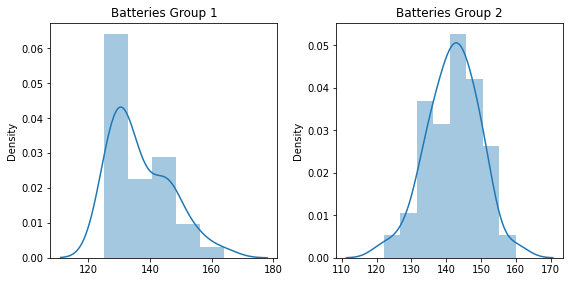

In [33]:
# So sánh 2 nhóm battery 1 và battery 2 theo phân phối tần suất và nhận xét
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot(life_array)
plt.title('Batteries Group 1')
plt.subplot(1, 2, 2)
sns.distplot(life2_array)
plt.title('Batteries Group 2')
plt.tight_layout(True)
plt.show()

- Biểu đồ trên cho thấy rằng có nhiều dữ liệu hơn cho Battery 2 trong khoảng 140 so với Battery 1 trong khoảng 130. Ngoài ra, mức độ biến thiên của Battery 2 ít hơn so với Battery 1. Dựa trên các kết quả này, có thể kết luận rằng Battery 2 là một nhãn hiệu tốt hơn (có trung bình cao hơn và biến thiên thấp hơn). Tuy nhiên, tính hợp lệ của kết luận này còn phụ thuộc vào cách thu thập dữ liệu.

In [34]:
# Làm bảng phân phối tần suất cho dữ liệu 120-129, 130-139, 140-149, 150 - 159, 160 - 169
freq2 = pd.Series()
freq2['120-129'] = np.extract((life2_array>=120) & (life2_array <=129), life2_array).size
freq2['130-139'] = np.extract((life2_array>=130) & (life2_array <=139), life2_array).size
freq2['140-149'] = np.extract((life2_array>=140) & (life2_array <=149), life2_array).size
freq2['150-159'] = np.extract((life2_array>=150) & (life2_array <=159), life2_array).size
freq2['160-169'] = np.extract((life2_array>=160) & (life2_array <=169), life2_array).size

<BarContainer object of 5 artists>

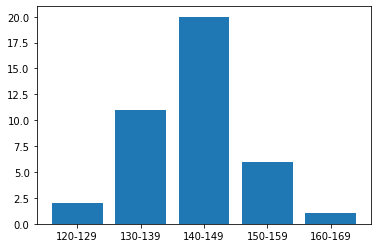

In [35]:
# Vẽ bar chart cho bảng phân phối tần suất trên
plt.bar(freq2.index, freq2)

In [36]:
# tạo bảng tần suất của cả 2 nhóm mẫu
freq_df = pd.DataFrame({"batteries_1":freq, "batteries_2":freq2})
freq_df

,batteries_1,batteries_2
120-129,10,2
130-139,16,11
140-149,10,20
150-159,3,6
160-169,1,1


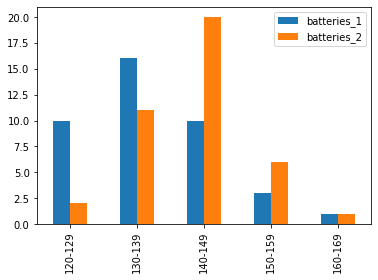

In [37]:
# So sánh hai nhóm mẫu, nhận xét kết quả
freq_df.plot.bar();

In [38]:
stats.describe(life_array)

DescribeResult(nobs=40, minmax=(125, 164), mean=136.85, variance=95.87435897435898, skewness=0.8455287049086152, kurtosis=-0.07613238307755621)

In [39]:
stats.describe(life2_array)

DescribeResult(nobs=40, minmax=(122, 160), mean=141.925, variance=55.19935897435898, skewness=-0.2510338974166527, kurtosis=0.3567028000549164)

#### Nhận xét:
- Những kết quả này cho thấy rằng Pin 2 có tuổi thọ trung bình cao hơn so với Pin 1 và Pin 2 có phương sai nhỏ hơn.
- Pin 1 có skewness > 0: phân phối lệch phải 
- Pin 2 có skewness < 0: phân phối lệch trái
- Pin 1 có kurtosis < 0: phân bố này thấp hơn phân bố chuẩn
- Pin 2 có kurtosis > 0: phân bố này cao hơn phân bố chuẩn

In [40]:
# Tạo 2 boxplot trên cùng 1 biểu đồ
df = pd.DataFrame({"batteries_1":life_array, "batteries_2":life2_array})
df.head()

,batteries_1,batteries_2
0,130,134
1,145,130
2,126,140
3,146,151
4,164,143


In [41]:
df.describe()

,batteries_1,batteries_2
count,40.000000,40.000000
mean,136.850000,141.925000
std,9.791545,7.429627
min,125.000000,122.000000
25%,129.750000,137.500000
50%,132.500000,142.000000
75%,145.000000,146.250000
max,164.000000,160.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   batteries_1  40 non-null     int64
 1   batteries_2  40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [43]:
dd=pd.melt(df, value_vars=['batteries_1','batteries_2'],var_name='batteries')
dd.head()

,batteries,value
0,batteries_1,130
1,batteries_1,145
2,batteries_1,126
3,batteries_1,146
4,batteries_1,164


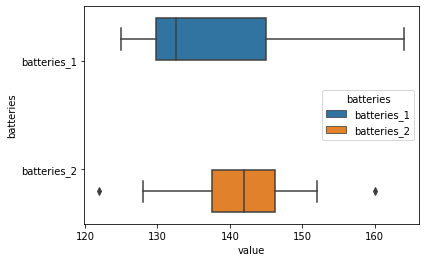

In [44]:
# Vẽ boxplot cho 2 nhóm Pin 1 và Pin 2 => nhận xét
sns.boxplot(y='batteries',x='value',data=dd,hue='batteries');

#### Nhận xét:
- Nhóm Pin 1 không có outliers, nhóm Pin 2 có outliers
- Phân phối Pin 2 tập trung hơn phân phối Pin 1
- Biểu đồ ở trên hỗ trợ cho kết luận: phạm vi của Pin 2 ngắn hơn so với Pin 1 (ít thay đổi hơn) và được lệch sang bên phải (trung bình cao hơn trung vị).